In [1]:
# load the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# import the data 
df = pd.read_csv('/Users/preshitadave/Downloads/datapoints.csv', index_col=None)

# PROBLEM 1

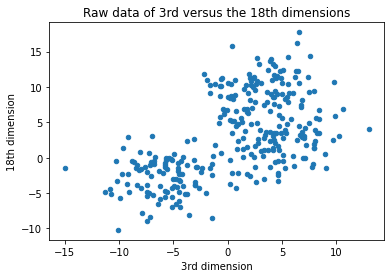

In [3]:
# Part A - visualising the raw data for all the points in the 3rd v/s 18th dimension
df.plot.scatter(x='2', y='17')
plt.xlabel('3rd dimension')
plt.ylabel('18th dimension')
plt.title('Raw data of 3rd versus the 18th dimensions');

In [4]:
# Part B - finding principle components and returning them in a df
size = len(df.columns)
pca = PCA(n_components = size) 
# pca.fit(df.to_numpy()) # this fits the model
scores = pca.fit_transform(df.to_numpy()) # this fits the model and applies dimensionality reduction
dfScores = pd.DataFrame(data = scores)
dfScores.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,19.449531,-9.205561,1.483845,0.298622,1.907189,1.932403,1.805941,-2.679595,2.446757,-2.075839,0.872516,-0.367090,2.786740,0.060869,1.176195,0.462079,1.679361,-1.645234,1.295988,3.165279
1,14.256032,-4.787531,0.635671,4.235459,-0.663979,8.090297,-2.070789,-1.095881,1.126791,0.688756,2.959866,0.253803,-2.781194,1.821687,0.248842,1.805805,1.870599,3.794675,-0.706354,2.495231
2,2.614282,16.753922,-0.460214,3.850638,-1.667367,-2.516891,-5.088551,0.924928,-1.465603,-3.362423,3.340204,0.883720,2.255539,2.753372,-2.288532,0.995473,-0.640504,-5.210043,1.803922,0.279415
3,-13.155587,-4.439978,2.577246,-4.931699,-0.688698,3.164437,1.635518,1.731904,-0.785951,-1.560959,-1.833057,-5.273586,-1.408587,0.092609,1.507077,-0.877069,-0.499607,-1.232077,2.321160,0.098330
4,-15.915419,-5.929977,2.415124,1.652355,0.199788,-2.590344,-1.357000,0.463776,1.204803,0.897765,-2.079389,-4.176975,-2.678965,3.890564,3.941198,0.217374,-0.122535,-1.982663,-2.199513,-2.684517


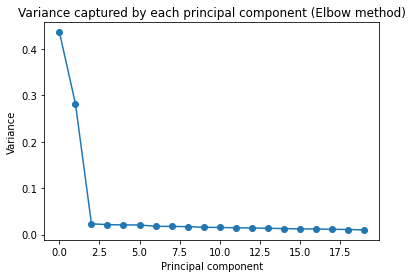

In [7]:
# Part C - Plotting variance captured by each principal component
plt.plot(range(0,20), pca.explained_variance_ratio_)
plt.scatter(range(0,20),pca.explained_variance_ratio_)
plt.ylabel('Variance')
plt.xlabel('Principal component')
plt.title('Variance captured by each principal component (Elbow method)'); 

In [8]:
print('Variance Explained by each principal component: ', pca.explained_variance_ratio_)

Variance Explained by each principal component:  [0.43564073 0.28191603 0.02329473 0.02145605 0.02091404 0.0206554
 0.01796797 0.01758981 0.01711461 0.01572273 0.0154126  0.01461655
 0.01417692 0.01360172 0.01300943 0.01224864 0.0121201  0.01145212
 0.01099109 0.01009872]


By looking at this plot, one can observe that the kink occurs at the 2nd dimension. The first and the second dimensions are able to explain upto 70% of the variance, based on the explained_variance values. The part after the kink in the plot signifies that variance doesn't decrease rapidly. PCA is a good option to reduce the dimensions of the given data as around 70% of the data can be explained by the first 2 components, rather than having all the dimension datapoints explain the variance of the data. 

Text(0.5, 1.0, 'PCA plot of the first two principal components')

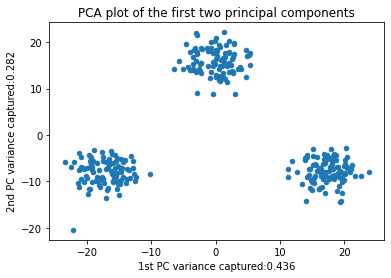

In [9]:
# Part D - Plotting the first two principal components
dfScores.plot.scatter(x=0, y=1, s = None)
plt.xlabel('1st PC variance captured:{}'.format(round(pca.explained_variance_ratio_[0],3)))
plt.ylabel('2nd PC variance captured:{}'.format(round(pca.explained_variance_ratio_[1],3)))
plt.title('PCA plot of the first two principal components')

# PROBLEM 2

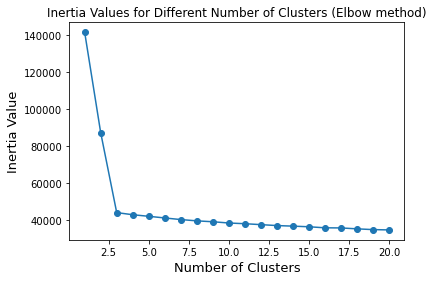

In [10]:
# Part A - to deduce the optimal number of clusters
 
inertia_list = [] # create an empty list to store all the values of sum of squared distances
for num_clusters in range(1, 21):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(scores)
    inertia_list.append(kmeans_model.inertia_)
   
# plot the inertia curve
plt.plot(range(1,21),inertia_list)
plt.scatter(range(1,21),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Inertia Values for Different Number of Clusters (Elbow method)");

Based on this plot, the optimal number of clusters would be 3 as the sharpest bend can be observed here. The inertia values do not decrease rapidly after 3, and so 3 clusters would be optimal. Inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster. Inertia gives us the sum of intracluster distances. 

In [21]:
# Part B - implementing K-Means clustering using the first two dimensions of the original data

# importing the datapoints file into a dataframe
df = pd.read_csv('/Users/preshitadave/Downloads/datapoints.csv', index_col=None)
X = df.iloc[:, 0:2] # Selecting only the first 2 dimensions

class kmeans():
    '''
    This class has the following methods: 
        1. distance_from_centroids: Calculates the distance from a datapoint to each of the centroids.
        2. cluster_allocate: Calls the method distance_from_centroids for all the datapoints.
        3. centroid_calc: Calculates the centroids based on the datapoints in a cluster. 
        4. compute_kmeans: Calls the method cluster_allocate and centroid_calc as many as times as specified.
        5. plot_clusters: Calls the compute_kmeans methods to obtain the clusters and plots them.
    '''
    def __init__(self,k,X): 
        '''
        Constructor class
        '''
        self.num_clusters = k # number of clusters
        self.data = X.values # data of the first 2 dimensions as a np array
        self.centroid = X.sample(n=self.num_clusters, random_state=20).values # selects the centroid as random rows from X as a np array
        #random_state helps to set a seed 
        self.cluster = np.zeros(self.data.shape[0]) # to store the results of the data points to which cluster it belongs to
 
    def distance_from_centroids(self, point):
        '''
        Calculates the distance from a datapoint to each of the centroids.
        Returns: dist, a list containing the distances to each centroid.
                 minindex, an int containing the index with the minimum distance.
        '''
        # d = 0 
        #check the dimension of the data point entry is same as that of the centroid, else print error message
        if (np.shape(point) == np.shape(self.centroid[0])): 
            n_dim = np.shape(point)[0] # number of dimensions
            dist = [] #stores the distance of a datapoint from the 'k' centroids
            for ind2, val2 in enumerate(self.centroid): # iterating through all the centroids
                d = 0 # initialize the distance to be 0 
                for i in range(n_dim): # going through all the dimensions
                    d += (point[i]-val2[i])**2 # calculates the distance of a datapoint from the centroid in that particular dimension
                dist.append(np.sqrt(d)) # appends it to a list
        else:
             print("Error: Dimension of point and each cluster not matching")

        minindex = dist.index(min(dist)) # obtain the index (to figure out which cluster) with the minimum distance from the centroid. 
        #Datapoint will then be assigned to that cluster
        return dist, minindex
        
    def cluster_allocate(self):
        '''
        This method calls the method distance_from_centroids for all the datapoints.
        Returns: self.cluster.
        '''
        for ind1, val1 in enumerate(self.data): # iterate through the datapoints 
            dist, minindex = self.distance_from_centroids(val1) 
            self.cluster[ind1] = minindex # assigns it to the cluster which has the minimum distance
        return self.cluster

    
    def centroid_calc(self):
        '''
        Calculates the centroids based on the datapoints in a cluster. 
        '''
        df1 = pd.DataFrame(X) # creating a dataframe with the required dimensions of data X
        df1['Cluster'] = self.cluster # adding a column 'Cluster' to store the cluster to which the datapoint belongs

        # calculation of the centroid for a cluster
        for i in range(self.num_clusters): # iterate through the clusters
            centroid = df1.loc[df1['Cluster'] == i].mean(axis=0) # calculates the mean along the columns
            self.centroid[i]= np.array(centroid[:-1]) # exclusing the mean of the cluster column, update the new centroids
        self.prev_cluster = df1 # datapoints and their clusters are stored 
    
    def compute_kmeans(self,iter):   
        '''
        Calls the method cluster_allocate and centroid_calc as many as times as specified.
        
        '''
        for i in range(iter):
            self.cluster_allocate()
            self.centroid_calc()

    def plot_clusters(self):
        '''
        Calls the compute_kmeans methods to obtain the clusters and plots them.
        '''
        self.compute_kmeans(10)
        sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
        hue_order = list(range(0, self.num_clusters))
        g = sns.relplot(data=self.prev_cluster, x='0', y='1', hue='Cluster', 
                    hue_order=hue_order, aspect=1.61,height = 5,
                    palette="deep")
        x,y=self.centroid.T 
        plt.scatter(x=x,y=y,s=20,c='purple',label='Centroids', marker = "*")
        for i in range(3):
            plt.annotate('Cluster {}'.format(i), (x[i], y[i]), fontsize=8)
        g.set(xlabel = 'Dimension 1', ylabel = 'Dimension 2')
        plt.title('Kmeans Clustering', fontweight = 'bold')


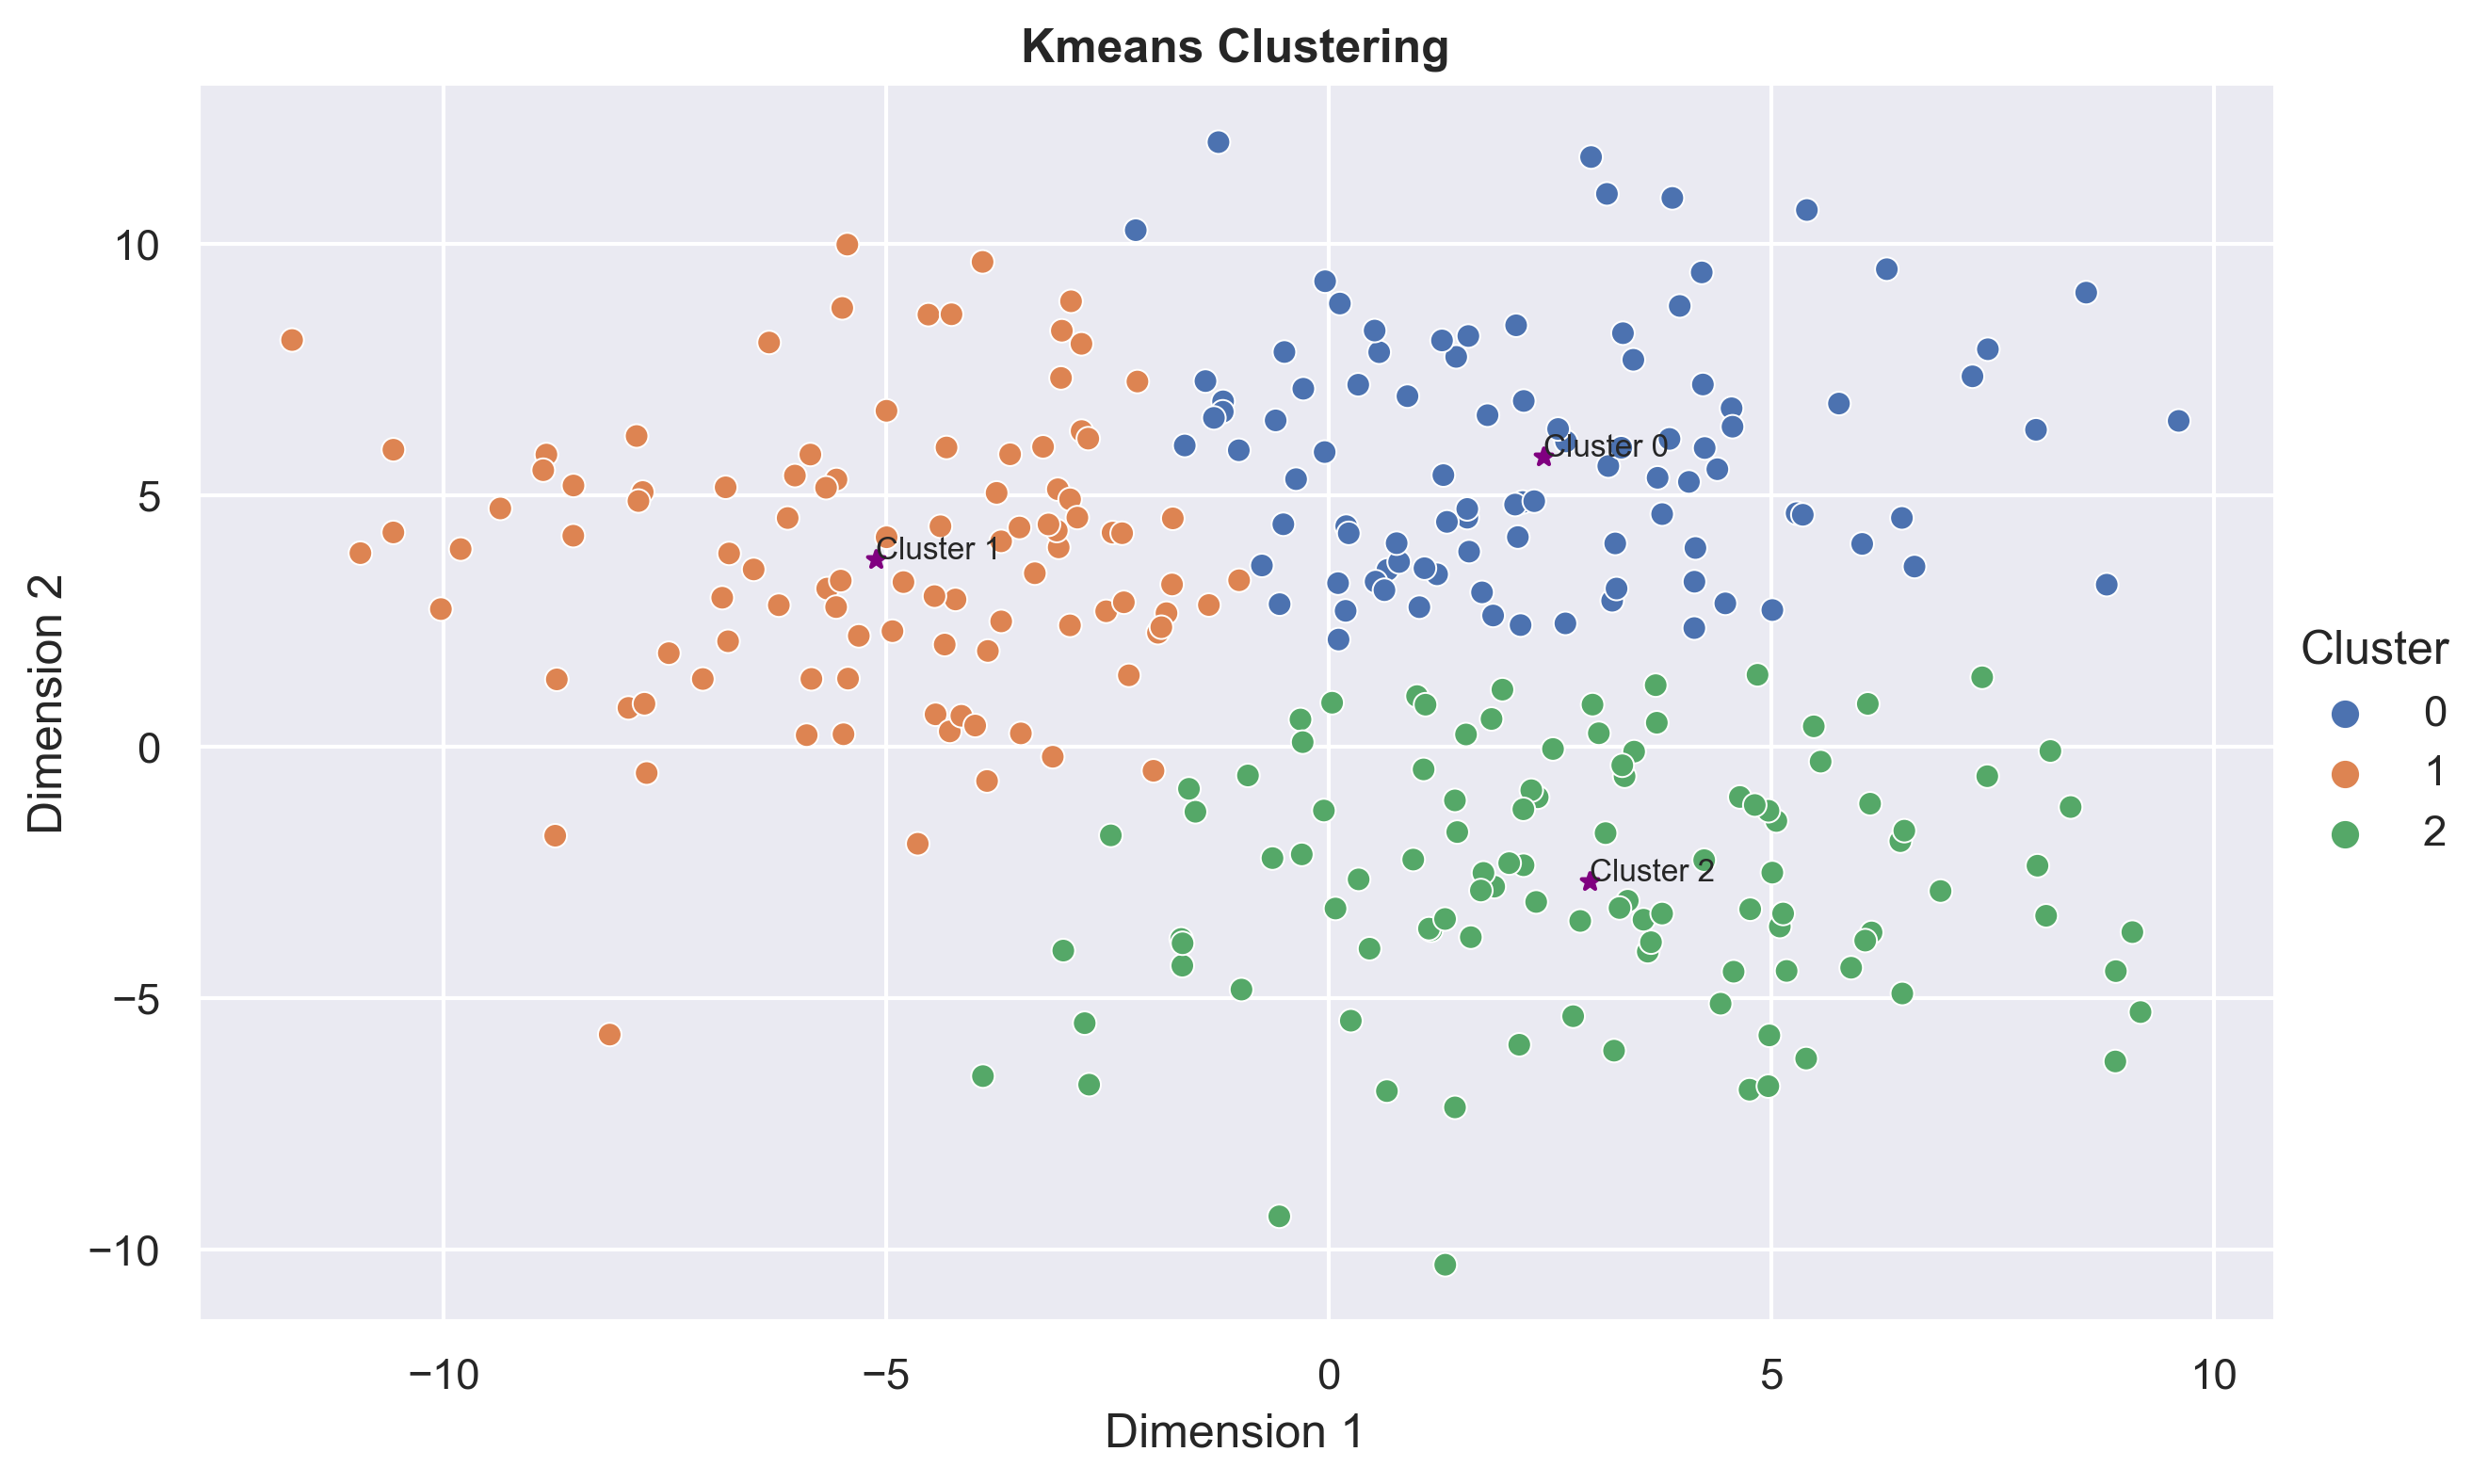

In [22]:
test = kmeans(3,X)
test.plot_clusters()